<a href="https://colab.research.google.com/github/Javlonbek-Math/ML-DL_projects/blob/main/Deep_learning_Land_vehicles_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Dataset***

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422 (from 1)
Receiving objects: 100% (422/422), 34.08 MiB | 20.75 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd  OIDv4_ToolKit && pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.2.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Bicycle --type_csv train --limit 300


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 29575 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

## Model

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path=Path('train')
#path.ls()
#fls=get_image_files(path)
#fls

In [ ]:
#Creating Datablock
land_vehicles=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#Creating Dataloader
dls=land_vehicles.dataloaders(path)

#Train data
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 129MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.965652,0.303424,0.900000,03:08


epoch,train_loss,valid_loss,accuracy,time
0,0.342027,0.213016,0.925000,04:25
1,0.268808,0.264625,0.925000,04:17
2,0.223437,0.319238,0.916667,04:20


epoch,train_loss,valid_loss,accuracy,time
0,0.342027,0.213016,0.925000,04:25
1,0.268808,0.264625,0.925000,04:17
2,0.223437,0.319238,0.916667,04:20
3,0.185344,0.331363,0.900000,04:18


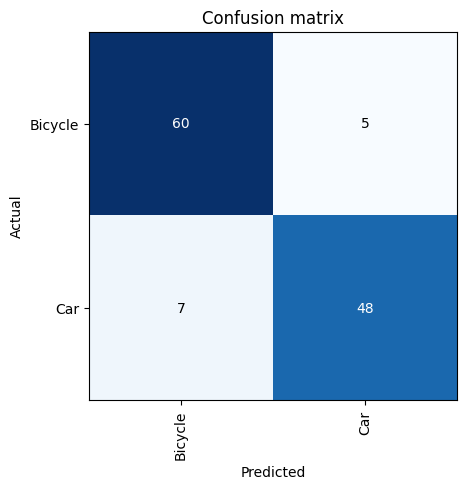

In [ ]:
#Checking
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

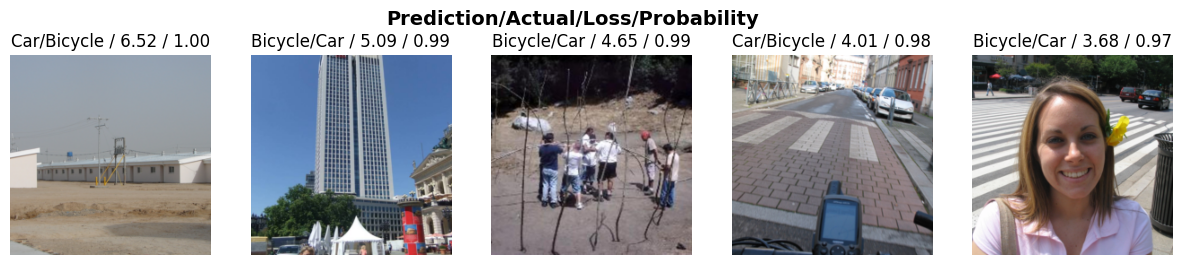

In [ ]:
interp.plot_top_losses(5,nrows=1)

### Model checking

In [ ]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Bicycle
Probability: 100.0


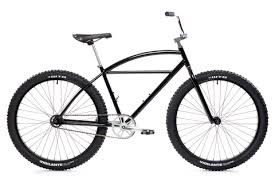

In [ ]:
img=PILImage.create(upload.data[-1])
pred, pred_id, probs=learn.predict(img)
print(f'Prediction: {pred}')
print(f'Probability: {probs[pred_id]*100:.1f}')
img

### Save modul

In [ ]:
learn.export('land_vehicle_model.pkl')